<a href="https://colab.research.google.com/github/dayaniravi123/Machine-Learning-Projects/blob/main/NLP_Tweeter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
## Implement all required libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

In [2]:
path = '/content/drive/MyDrive/Machine Learning - Tensorflow /Corona NLP/Corona_NLP_train.csv'
path

'/content/drive/MyDrive/Machine Learning - Tensorflow /Corona NLP/Corona_NLP_train.csv'

In [8]:
## read dataset from csv file

dataset = pd.read_csv(path, encoding = "ISO-8859-1")
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


(array([ 7713.,     0., 11422.,     0.,     0.,  5481.,     0.,  9917.,
            0.,  6624.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

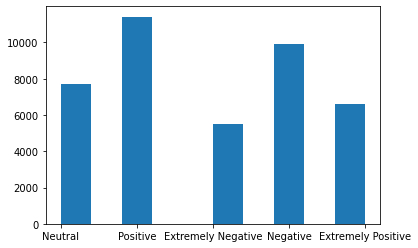

In [13]:
## check unique class label

print(dataset['Sentiment'].unique())

## Plot histogram of class label
plt.hist(dataset['Sentiment'])

In [24]:
## Build pipeline for Naive Bayes model

NLP_model = Pipeline([
                      ('counter', CountVectorizer()),
                      ('tf-idf', TfidfTransformer()),
                      ('naive', MultinomialNB())
                    ])

NLP_model.fit(dataset['OriginalTweet'], dataset['Sentiment'])

Pipeline(steps=[('counter', CountVectorizer()), ('tf-idf', TfidfTransformer()),
                ('naive', MultinomialNB())])

In [25]:
## Model evaluation

test_db = pd.read_csv('/content/drive/MyDrive/Machine Learning - Tensorflow /Corona NLP/Corona_NLP_test.csv', encoding= "ISO-8859-1")
test_db

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [26]:
prediction = NLP_model.predict(test_db['OriginalTweet'])

np.mean(prediction == test_db['Sentiment'])


0.3222748815165877